 **IMPORTING DATASET**

In [1]:
# we download data from github
!wget 'https://github.com/vitsiupia/projektPython/raw/main/ami_meetings.zip'


--2023-11-26 18:38:34--  https://github.com/vitsiupia/projektPython/raw/main/ami_meetings.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/vitsiupia/business-meetings-summarization/raw/main/ami_meetings.zip [following]
--2023-11-26 18:38:35--  https://github.com/vitsiupia/business-meetings-summarization/raw/main/ami_meetings.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vitsiupia/business-meetings-summarization/main/ami_meetings.zip [following]
--2023-11-26 18:38:35--  https://raw.githubusercontent.com/vitsiupia/business-meetings-summarization/main/ami_meetings.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (

In [2]:
import zipfile
# Unzip the file
zip_ref = zipfile.ZipFile('ami_meetings.zip')
zip_ref.extractall('ami_meetings')
zip_ref.close()

**MOVING THEM TO THEIR FOLDERS**

In [3]:
import os
import shutil

# Path to the root folder
folder_path = 'ami_meetings/'

# Paths to subfolders
abstractive_path = os.path.join(folder_path, 'abstractive')
transcripts_path = os.path.join(folder_path, 'transcripts')
test_path = 'test/'

# Create folder "/test" if it does not exist
if not os.path.exists(test_path):
    os.makedirs(test_path)

# Get lists of files in both subfolders
abstractive_files = os.listdir(abstractive_path)
transcript_files = os.listdir(transcripts_path)

# Check which transcripts don't have summaries
transcripts_without_summary = []
for transcript_file in transcript_files:
    summary_file = transcript_file.replace('.transcript', '.abssumm')
    if summary_file not in abstractive_files:
        transcripts_without_summary.append(transcript_file)

# Move transcripts without summaries to the /test folder
for transcript_file in transcripts_without_summary:
    source_path = os.path.join(transcripts_path, transcript_file)
    target_path = os.path.join(test_path, transcript_file)
    shutil.move(source_path, target_path)

print("Moved transcripts without summaries to the /test folder.")

Moved transcripts without summaries to the /test folder.


In [4]:
import os
import random
import shutil

# Paths to subfolders
transcripts_path = os.path.join(folder_path, 'transcripts')
abstractive_path = os.path.join(folder_path, 'abstractive')
untouched_path = 'ami_meetings_untouched/'

# Create a "ami_meetings_untouched" folder if it doesn't exist
if not os.path.exists(untouched_path):
    os.makedirs(untouched_path)

# Paths to subfolders in "ami_meetings_untouched"
train_transcripts_path = os.path.join(untouched_path, 'train', 'transcripts')
train_summaries_path = os.path.join(untouched_path, 'train', 'summaries')
val_transcripts_path = os.path.join(untouched_path, 'val', 'transcripts')
val_summaries_path = os.path.join(untouched_path, 'val', 'summaries')

# Create destination folders if they don't exist
for path in [train_transcripts_path, train_summaries_path, val_transcripts_path, val_summaries_path]:
    if not os.path.exists(path):
        os.makedirs(path)

# Download the list of files in the transcripts folder
transcript_files = os.listdir(transcripts_path)
random.shuffle(transcript_files)

# Calculate the number of files to move to the training folder
train_files_count = int(len(transcript_files) * 0.75)

# Move files to training folder
for i in range(train_files_count):
    transcript_file = transcript_files[i]
    summary_file = transcript_file.replace('.transcript', '.abssumm')

    source_transcript_path = os.path.join(transcripts_path, transcript_file)
    target_transcript_path = os.path.join(train_transcripts_path, transcript_file)
    shutil.move(source_transcript_path, target_transcript_path)

    source_summary_path = os.path.join(abstractive_path, summary_file)
    target_summary_path = os.path.join(train_summaries_path, summary_file)
    shutil.move(source_summary_path, target_summary_path)

# Download the list of files in the transcripts folder
for i in range(train_files_count, len(transcript_files)):
    transcript_file = transcript_files[i]
    summary_file = transcript_file.replace('.transcript', '.abssumm')

    source_transcript_path = os.path.join(transcripts_path, transcript_file)
    target_transcript_path = os.path.join(val_transcripts_path, transcript_file)
    shutil.move(source_transcript_path, target_transcript_path)

    source_summary_path = os.path.join(abstractive_path, summary_file)
    target_summary_path = os.path.join(val_summaries_path, summary_file)
    shutil.move(source_summary_path, target_summary_path)

print("Moved files to the appropriate folders in the new directory structure")

Moved files to the appropriate folders in the new directory structure


In [5]:
import os
import shutil



#  folder "/test"
shutil.move(test_path, untouched_path)

print("folder '/test' do 'ami_meetings_untouched'.")

folder '/test' do 'ami_meetings_untouched'.


In [6]:
import os
import zipfile
path = 'ami_meetnigs_untouched'
def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file))
zipf = zipfile.ZipFile('ami_meetings_untouched.zip', 'w', zipfile.ZIP_DEFLATED)
zipdir('ami_meetings_untouched', zipf)
zipf.close()

**CONVERTING INTO DATAFRAME**

In [10]:
import os
import pandas as pd

# Set the paths to the main folder and the train and val subfolders
main_folder = 'ami_meetings_untouched'
train_folder = os.path.join(main_folder, 'train')
val_folder = os.path.join(main_folder, 'val')

# Initialize lists to store the data
data = []

# Process the train data
for root, dirs, files in os.walk(os.path.join(train_folder, 'transcripts')):
    for file in files:
        if file.endswith('.transcript.txt'):
            meeting_id = file.split('.')[0]
            transcript_path = os.path.join(root, file)
            summary_path = os.path.join(train_folder, 'summaries', f'{meeting_id}.abssumm.txt')

            with open(transcript_path, 'r') as transcript_file:
                transcript = transcript_file.read().strip()

            with open(summary_path, 'r') as summary_file:
                summary = summary_file.read().strip()

            data.append([transcript, summary, meeting_id])

# Process the validation data
for root, dirs, files in os.walk(os.path.join(val_folder, 'transcripts')):
    for file in files:
        if file.endswith('.transcript.txt'):
            meeting_id = file.split('.')[0]
            transcript_path = os.path.join(root, file)
            summary_path = os.path.join(val_folder, 'summaries', f'{meeting_id}.abssumm.txt')

            with open(transcript_path, 'r') as transcript_file:
                transcript = transcript_file.read().strip()

            with open(summary_path, 'r') as summary_file:
                summary = summary_file.read().strip()

            data.append([transcript, summary, meeting_id])

# Create the DataFrame
df = pd.DataFrame(data, columns=['transcript', 'summary', 'meeting_id'])

# Perform train-val split
train_df = df[df['meeting_id'].str.startswith('train/')]
val_df = df[df['meeting_id'].str.startswith('val/')]

# Remove the 'train/' and 'val/' prefixes from the meeting_id column
train_df['meeting_id'] = train_df['meeting_id'].str.replace('train/', '')
val_df['meeting_id'] = val_df['meeting_id'].str.replace('val/', '')

# Reset the index for both DataFrames
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

In [11]:
df


,transcript,summary,meeting_id
0,"Hello. Um, Project Manager, I have something t...",The project manager went over the agenda. The ...,TS3007c
1,Okay. Keyboard work. Yeah. Alright. That's tru...,The industrial designer talked about the optio...,TS3008c
2,So we come to the third meetings. I have good....,The Industrial Designer presented options for ...,IS1007c
3,Mm. Oh my name's Andrew I'm a I'm the Market R...,The project manager opens the meeting by welco...,ES2012a
4,"Okay. Oh, that's not gonna work. Oh, alright. ...",The project manager opened the meeting and had...,ES2016a
...,...,...,...
137,That's my task. Okay. Uh I've Where have I put...,The project manager opened the meeting by expl...,TS3010b
138,"Ah, pinball. Huh. Uh, maybe I'll have somethin...",The industrial designer gave a presentation on...,TS3010c
139,"Did you manage? Okay. Ah. Hello. No, just uh a...","For the conceptual design, the ID suggested to...",TS3012c
140,"Okay. Good morning everybody. Oh, everybody is...",The project manager Sebastian opens the meetin...,IS1004a


In [12]:
import pandas as pd
import re

# Assuming 'df' is the DataFrame containing the 'transcript', 'summary', and 'meeting_id' columns

# Lowercase the text in 'transcript' and 'summary' columns
df['transcript'] = df['transcript'].str.lower()
df['summary'] = df['summary'].str.lower()

# Define a regular expression pattern to insert spaces between words and punctuation marks
pattern = r'(\w+|[^\w\s])'

# Apply the pattern to 'transcript' and 'summary' columns
df['transcript'] = df['transcript'].apply(lambda x: ' '.join(re.findall(pattern, x)))
df['summary'] = df['summary'].apply(lambda x: ' '.join(re.findall(pattern, x)))

In [13]:
df

,transcript,summary,meeting_id
0,"hello . um , project manager , i have somethin...",the project manager went over the agenda . the...,TS3007c
1,okay . keyboard work . yeah . alright . that '...,the industrial designer talked about the optio...,TS3008c
2,so we come to the third meetings . i have good...,the industrial designer presented options for ...,IS1007c
3,mm . oh my name ' s andrew i ' m a i ' m the m...,the project manager opens the meeting by welco...,ES2012a
4,"okay . oh , that ' s not gonna work . oh , alr...",the project manager opened the meeting and had...,ES2016a
...,...,...,...
137,that ' s my task . okay . uh i ' ve where have...,the project manager opened the meeting by expl...,TS3010b
138,"ah , pinball . huh . uh , maybe i ' ll have so...",the industrial designer gave a presentation on...,TS3010c
139,"did you manage ? okay . ah . hello . no , just...","for the conceptual design , the id suggested t...",TS3012c
140,"okay . good morning everybody . oh , everybody...",the project manager sebastian opens the meetin...,IS1004a


**TRAIN, TEST AND SPLITTING DATA**

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' contains the DataFrame with columns 'transcript', 'summary', and 'meeting_id'

# Perform train-val split
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Reset the index for both DataFrames
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

In [15]:
# Export DataFrame to a CSV file
df.to_csv('ami_meetings.csv', index=False)

In [16]:
train_df.to_csv('ami_meetings_train.csv', index=False)
val_df.to_csv('ami_meetings_val.csv', index=False)

In [17]:
# Set the path to the "test/" folder
test_folder = os.path.join("ami_meetings_untouched", "test")

# Initialize a list to store the data
data = []

# Process the test data
for root, dirs, files in os.walk(test_folder):
    for file in files:
        if file.endswith('.transcript.txt'):
            meeting_id = file.split('.')[0]
            transcript_path = os.path.join(root, file)

            with open(transcript_path, 'r') as transcript_file:
                transcript = transcript_file.read().strip()

            data.append([transcript, meeting_id])

# Create the DataFrame
test_df = pd.DataFrame(data, columns=['transcript', 'meeting_id'])

In [20]:
import re

# Create a copy of df_test
test_df_preprocessed = test_df.copy()

# Lowercase the text in 'transcript' column
test_df_preprocessed['transcript'] = test_df_preprocessed['transcript'].str.lower()

# Define a regular expression pattern to insert spaces between words and punctuation marks
pattern = r'(\w+|[^\w\s])'

# Apply the pattern to 'transcript' column
test_df_preprocessed['transcript'] = test_df_preprocessed['transcript'].apply(lambda x: ' '.join(re.findall(pattern, x)))

In [21]:
test_df_preprocessed

,transcript,meeting_id
0,yeah . yeah . yeah . yeah . yeah . so so m so ...,EN2009d
1,and something to fidget with . okay . see on y...,EN2006a
2,okay . mm - hmm . okay . okay . mm - hmm . oka...,IN1008
3,no . yep . uh you can be sitting here itself a...,IN1002
4,"oh dear , this doesn ' t stick at all . what r...",EN2002d
5,okay . mm - hmm . or actually look at the pitc...,IN1009
6,"hey look , these are microphones they uh they ...",IB4004
7,"and it ' s always the other way around , that ...",IN1012
8,sorry . i don ' t have my presentation . um ye...,IN1014
9,hmm ? this isn ' t supposed to look like just ...,EN2001b


In [22]:
test_df.to_csv('ami_meetings_test_untouched.csv', index=False)
test_df_preprocessed.to_csv('ami_meetings_test.csv', index=False)

**DATA VISUAIZATION**

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
import nltk
from nltk.corpus import stopwords
from scipy import stats
import statsmodels.api as sm
from wordcloud import WordCloud, STOPWORDS
import string
%matplotlib inline

# custom palette for plots
custom_palette = ['#b388eb', '#8093f1', '#72ddf7']

In [24]:
train_data=pd.read_csv('ami_meetings_train.csv')
val_data=pd.read_csv('ami_meetings_val.csv')
test_data=pd.read_csv('ami_meetings_test.csv')

train_data

,transcript,summary,meeting_id
0,hello . good morning . uh before i start with ...,the participants introduced themselves and the...,TS3007a
1,okay . mm - hmm . mm - hmm . so you sa so pier...,one team member presented her proposal regardi...,IB4005
2,mm - hmm . yeah . okay . so uh you can have my...,the project manager presented the final cost o...,IS1001d
3,alima . okay . um i don ' t know which one of ...,the project manager opened the meeting and int...,ES2008a
4,"hi . yeah , good . hmm . yeah . going to the n...",the project manager opens the meeting by going...,IS1009c
...,...,...,...
108,okay . hi everybody and welcome to our kick - ...,the project manager introduced the project to ...,ES2010a
109,is it working ? and so think of this concept ....,the project manager recapped the decisions mad...,ES2002c
110,"no , you ' ll ha have to open it up from elsew...",the first prototype for the remote control was...,ES2014d
111,so we ' ve got both of these clipped on ? she ...,the project manager gave an introduction to th...,ES2004a


In [25]:
test_data.head()

,transcript,meeting_id
0,yeah . yeah . yeah . yeah . yeah . so so m so ...,EN2009d
1,and something to fidget with . okay . see on y...,EN2006a
2,okay . mm - hmm . okay . okay . mm - hmm . oka...,IN1008
3,no . yep . uh you can be sitting here itself a...,IN1002
4,"oh dear , this doesn ' t stick at all . what r...",EN2002d


In [26]:
train_data['split'] = 'train'
val_data['split'] = 'val'
test_data.insert(1, 'summary', '')  # add a missing column before concatenating
test_data['split'] = 'test'

In [27]:
data = pd.concat([train_data, val_data, test_data], ignore_index=True)
data

,transcript,summary,meeting_id,split
0,hello . good morning . uh before i start with ...,the participants introduced themselves and the...,TS3007a,train
1,okay . mm - hmm . mm - hmm . so you sa so pier...,one team member presented her proposal regardi...,IB4005,train
2,mm - hmm . yeah . okay . so uh you can have my...,the project manager presented the final cost o...,IS1001d,train
3,alima . okay . um i don ' t know which one of ...,the project manager opened the meeting and int...,ES2008a,train
4,"hi . yeah , good . hmm . yeah . going to the n...",the project manager opens the meeting by going...,IS1009c,train
...,...,...,...,...
166,"yeah , mm - hmm . hmm . thank you . no , i don...",,EN2005a,test
167,"no . yeah . okay . i like the timeline . uh , ...",,EN2002b,test
168,so we are here to just make the point . well m...,,IN1001,test
169,"you can write on the paper , yeah . it ' s it ...",,IN1013,test


In [28]:
data['tran_word_length']=data['transcript'].apply(lambda text: len(text.split(" ")))
data['tran_char_length']=data['transcript'].apply(len)

In [29]:
data['sum_word_length']=data['summary'].apply(lambda text: len(text.split(" ")) if len(text.split(" ")) != 1 else 0 )
data['sum_char_length']=data['summary'].apply(len)

In [30]:
data

,transcript,summary,meeting_id,split,tran_word_length,tran_char_length,sum_word_length,sum_char_length
0,hello . good morning . uh before i start with ...,the participants introduced themselves and the...,TS3007a,train,4355,17736,173,1007
1,okay . mm - hmm . mm - hmm . so you sa so pier...,one team member presented her proposal regardi...,IB4005,train,8363,35374,148,830
2,mm - hmm . yeah . okay . so uh you can have my...,the project manager presented the final cost o...,IS1001d,train,2113,8566,114,666
3,alima . okay . um i don ' t know which one of ...,the project manager opened the meeting and int...,ES2008a,train,3240,13967,138,791
4,"hi . yeah , good . hmm . yeah . going to the n...",the project manager opens the meeting by going...,IS1009c,train,5535,24731,214,1223
...,...,...,...,...,...,...,...,...
166,"yeah , mm - hmm . hmm . thank you . no , i don...",,EN2005a,test,19312,85692,0,0
167,"no . yeah . okay . i like the timeline . uh , ...",,EN2002b,test,7966,32980,0,0
168,so we are here to just make the point . well m...,,IN1001,test,12146,50009,0,0
169,"you can write on the paper , yeah . it ' s it ...",,IN1013,test,14305,61194,0,0


In [31]:
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))

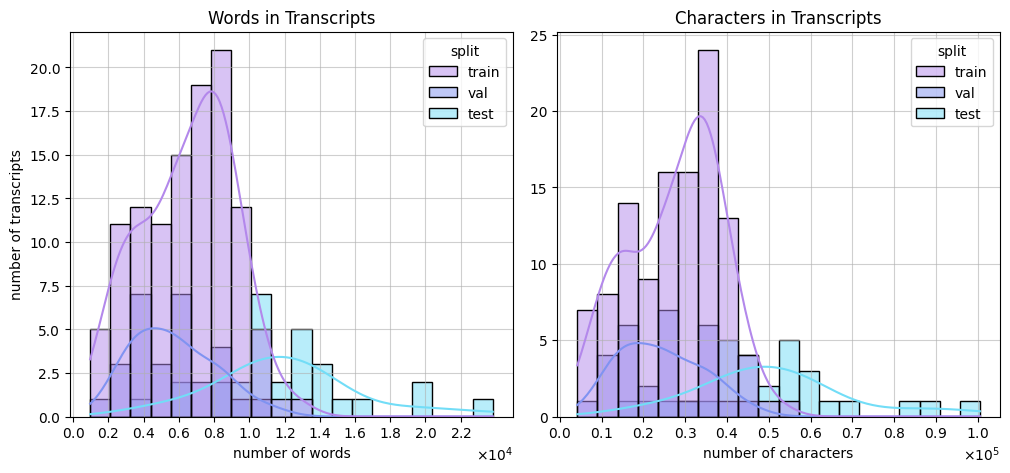

In [32]:
plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=0.1)

# histogram of number of words in transcripts
plt.subplot(121, xlabel='number of words', ylabel='number of transcripts', title='Words in Transcripts')
sns.histplot(data=data, x='tran_word_length', stat='count', kde=True, bins=20, hue='split', palette=custom_palette)
plt.gca().set_xticks(np.arange(0, data['tran_word_length'].max(), 2e3))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().grid(True, alpha=.6)

# histogram of character lengths in transcripts
plt.subplot(122, xlabel='number of characters', ylabel=' ', title='Characters in Transcripts')
sns.histplot(data=data, x='tran_char_length', stat='count', kde=True, bins=20, hue='split', palette=custom_palette)
plt.gca().set_xticks(np.arange(0, data['tran_char_length'].max(), 1e4))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().grid(True, alpha=.6)

**SUMMARIZATION**

In [33]:
import os
import zipfile
import random
from transformers import pipeline

# Specify the path to your ami_meetings.zip file
zip_file_path = "ami_meetings.zip"

# Step 1: Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("extracted_folder")

# Step 2: Get a list of text files in the subfolders of the extracted folder
text_files = []
for root, dirs, files in os.walk("extracted_folder"):
    for file in files:
        if file.endswith(".txt"):
            text_files.append(os.path.join(root, file))

# Check if there are any text files
if not text_files:
    print("No text files found in the 'extracted_folder'.")
else:
    # Step 3: Randomly select a text file
    if len(text_files) == 0:
        print("No text files available for selection.")
    else:
        random_text_file = random.choice(text_files)

        # Step 4: Read text from the randomly selected file
        with open(random_text_file, 'r') as file:
            input_text = file.read()

        # Truncate the input text if it exceeds the maximum sequence length
        max_sequence_length = 1024
        input_text = input_text[:max_sequence_length]

        # Step 5: Use the summarizer with the truncated text
        model_name = "sshleifer/distilbart-cnn-12-6"
        model_revision = "a4f8f3e"

        summarizer = pipeline("summarization", model=model_name, revision=model_revision)

        try:
            # Store original text and summaries
            result = summarizer(input_text, max_length=150, min_length=50, length_penalty=0.8)

            # Print original text and summaries
            print("\nOriginal Text:")
            print(input_text)
            print("\nSummary:")
            print(result[0]['summary_text'])
        except Exception as e:
            print(f"Error: {e}")


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]


Original Text:
Okay. Right. Conceptual design meeting. Right. Okay, so Right well um from the last meeting I was trying to send you the minutes, but uh it didn't work out too well, so maybe in sort of um quick summary of the last uh meeting, I can quickly give you what we what we had. Uh right, so Wishing I hadn't closed the damn Right so we had the fact that we're gonna have the the logo uh the company logo in its uh colour scheme incorporated onto the the device the remote device. We had uh made our decisions about uh made our decisions about uh the device itself, that it was gonna be simple to make it uh enable us to complete the project in time. We're gonna have uh effectively two pages, a front page which had the uh features that the uh the customers most wanted, and then the uh the backup features on the second page so that it could uh meet the technical requirements. And the customers wouldn't have to look at them too often, only as and when required. So. So basically what deci